In [57]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc

In [ ]:
import os
os.chdir("../../DATA/Brain_subregion/")

In [59]:
mat = pd.read_csv("GSM6204636_MouseBrain_20um_matrix.tsv", sep="\t", index_col=0).T

In [60]:
spatial = pd.read_csv("MouseBrain_20um_spatial/tissue_positions_list.csv", index_col=0, header=None)

In [61]:
adata = ad.AnnData(X=mat)

In [ ]:
spatial.columns = ["in_tissue","row","col","array_row","array_col"]
# adata = adata[spatial.index]
spatial = spatial.reindex(list(adata.obs_names))
(spatial.index == adata.obs_names).all()

True

In [63]:
adata.obsm["spatial"] =  np.array(spatial[["row","col"]])

In [65]:
adata.obs["in_tissue"] = list(spatial["in_tissue"])
adata = adata[adata.obs["in_tissue"]>0]

In [66]:
spatial = pd.DataFrame(adata.obsm["spatial"])
spatial.columns = ["x","y"]
spatial["x"] = [-1*i for i in list(spatial["x"])]
spatial["y"] = [-1*i for i in list(spatial["y"])]

adata.obsm["spatial"] = np.array(spatial[["x","y"]])

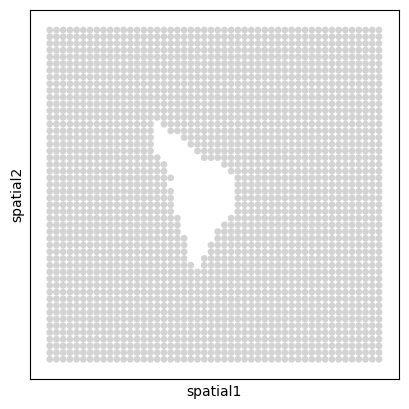

In [67]:
sc.pl.spatial(adata, spot_size=1)

In [68]:
adata.write("rna.h5ad")

In [45]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

/mnt/datadisk/lizhongzhan/miniconda3/envs/scSLAT/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


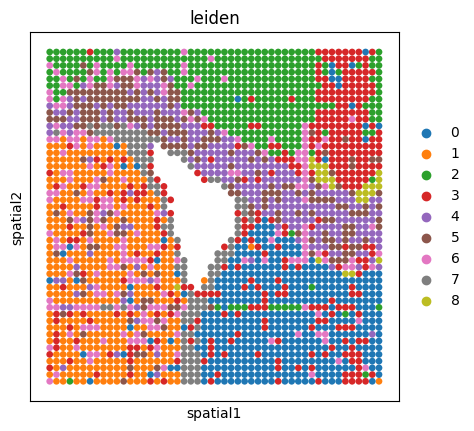

In [46]:
sc.pl.spatial(adata, color="leiden", spot_size=1)